['guestroom_yes' 'basement_yes' 'mainroad_yes' 'hotwaterheating_yes'
 'airconditioning_yes' 'furnishingstatus_semi-furnished'
 'furnishingstatus_unfurnished' 'prefarea_yes']
[0]	train-rmse:0.33678	eval-rmse:0.42476
[1]	train-rmse:0.32294	eval-rmse:0.41001
[2]	train-rmse:0.31229	eval-rmse:0.40035
[3]	train-rmse:0.30112	eval-rmse:0.39075
[4]	train-rmse:0.29051	eval-rmse:0.37901
[5]	train-rmse:0.28203	eval-rmse:0.37076
[6]	train-rmse:0.27389	eval-rmse:0.36139
[7]	train-rmse:0.26693	eval-rmse:0.35471
[8]	train-rmse:0.26045	eval-rmse:0.34864
[9]	train-rmse:0.25402	eval-rmse:0.34188
[10]	train-rmse:0.24909	eval-rmse:0.33666
[11]	train-rmse:0.24474	eval-rmse:0.33268
[12]	train-rmse:0.24027	eval-rmse:0.32814
[13]	train-rmse:0.23665	eval-rmse:0.32396
[14]	train-rmse:0.23255	eval-rmse:0.31891
[15]	train-rmse:0.22906	eval-rmse:0.31478
[16]	train-rmse:0.22530	eval-rmse:0.31103
[17]	train-rmse:0.22256	eval-rmse:0.30812
[18]	train-rmse:0.21980	eval-rmse:0.30538
[19]	train-rmse:0.21722	eval-rmse:0.30

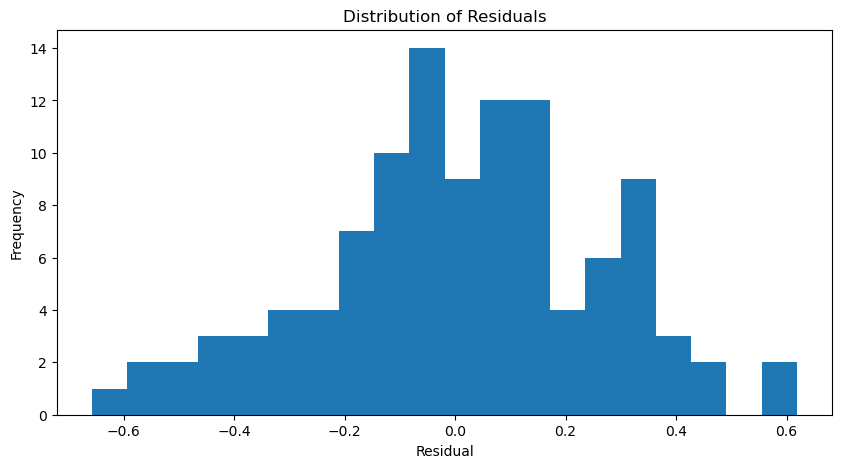

R^2 score: 0.6680031790154302


['model.joblib']

In [16]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split
from xgboost import DMatrix, train
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt
from joblib import dump

df = pd.read_csv('/Users/ajibolaoluwatobiloba/Desktop/AMOD5410- Big Data/Assignments/Term project/house-prices-advanced-regression-techniques/Housing.csv')

# Preprocessing data
encoder = OneHotEncoder(drop='first')
categorical_cols = ['guestroom', 'basement', 'mainroad', 'hotwaterheating', 'airconditioning', 'furnishingstatus', 'prefarea']
encoded_categorical = encoder.fit_transform(df[categorical_cols])
encoded_df = pd.DataFrame(encoded_categorical.toarray(), columns=encoder.get_feature_names_out(categorical_cols))

preprocessed_data = df.drop(categorical_cols, axis=1)
preprocessed_data = pd.concat([preprocessed_data, encoded_df], axis=1)

preprocessed_data['price_log'] = np.log(preprocessed_data['price'] + 1)

# the column names generated by the OneHotEncoder
column_names = encoder.get_feature_names_out(categorical_cols)


# Updating the column selection based on the generated column names
X = preprocessed_data[['area'] + list(column_names) + ['bedrooms', 'bathrooms', 'parking']]
y = preprocessed_data['price_log']


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

dtrain = DMatrix(X_train, label=y_train)
dtest = DMatrix(X_test, label=y_test)

params = {'objective': 'reg:squarederror', 'learning_rate': 0.1, 'max_depth': 2, 'min_child_weight': 2, 'subsample': 0.8, 'colsample_bytree': 0.8}

eval_data = [(dtrain, 'train'), (dtest, 'eval')]

model = train(params, dtrain, num_boost_round=100, evals=eval_data)

predictions = model.predict(dtest)
error = mean_squared_error(y_test, predictions)

print('Evaluation error:', error)

residuals = y_test - predictions

plt.figure(figsize=(10, 5))
plt.hist(residuals, bins=20)
plt.xlabel('Residual')
plt.ylabel('Frequency')
plt.title('Distribution of Residuals')
plt.show()

# Calculate R^2 score
r2 = r2_score(y_test, predictions)

print('R^2 score:', r2)

dump(model, 'model.joblib')